# Twitter Analysis - University comparison

------------

In [2]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
%reload_ext autoreload
%autoreload 1
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('max_colwidth',100)    

display(HTML("<style>.container { width:95% !important; }</style>"))

import sys
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
from itertools import combinations, takewhile
import collections
import pandas as pd
import numpy as np
import os

from simhash import Simhash, SimhashIndex

sns.set()

from Utils.UtilsViz import *
# from Utils.UtilsGeoViz import *

In [3]:
os.getcwd()

'/home/sriharis/git_projects/BigDataEngg/final_project'

In [4]:
# fpath = os.path.join(os.getcwd(), "temp.csv")
# fpath = os.path.join(os.getcwd(), "temp2.csv")
fpath = os.path.join(os.getcwd(), "uni_data.csv")
tweets_df = pd.read_csv(fpath, index_col="Unnamed: 0", nrows=2e6)
display(
    tweets_df.shape,
    tweets_df.head()
)

(31831, 24)

,id_str,text,in_reply_to_status_id_str,in_reply_to_user_id_str,created_at,user_id_str,user_name,user_followers_count,user_favorites_count,user_statuses_count,user_friends_count,coordinates,favorite_count,entities_hashtags,favorited,place_country,place_country_code,place_name,place_type,retweet_count,retweeted,retweeted_status_user_id_str,retweeted_status_user_name,hashtags_cleaned
0,878029049469190145,RT @jmcgonigal9: Penn State student section tickets sold out in 89 minutes\n\nhttps://t.co/KIm2e...,NaN,NaN,Thu Jun 22 23:16:53 +0000 2017,774045894652166144,David Kononchuk,3,132,130,44,NaN,0,[],False,NaN,NaN,NaN,NaN,0,False,3.366467e+08,John McGonigal,[]
1,878029136089894912,...A SIGNIFICANT WEATHER ADVISORY HAS BEEN ISSUED UNTIL 630 PM CDT FOR... Northwestern Marshall ...,NaN,NaN,Thu Jun 22 23:17:13 +0000 2017,888181566,AmericaAlerts App,602,0,85724,607,NaN,0,"[Row(indices=[112, 115], text='Wx')]",False,NaN,NaN,NaN,NaN,0,False,NaN,NaN,['Wx']
2,878029276557131776,Inspired by this innovative wave 4 forming whole students that @CSUDH is riding &amp; stoking w/...,NaN,NaN,Thu Jun 22 23:17:47 +0000 2017,2363593488,Giacomo,875,693,3086,1221,NaN,0,[],False,NaN,NaN,NaN,NaN,0,False,NaN,NaN,[]
3,878029303304208384,RT @gringene_bio: @Big3BioSF @OmicsOmicsBlog @Stanford @PacBio If you're making DNA look like it...,NaN,NaN,Thu Jun 22 23:17:53 +0000 2017,120418926,Samuel Lampa,1047,5796,9391,1054,NaN,0,[],False,NaN,NaN,NaN,NaN,0,False,7.091099e+17,David Eccles,[]
4,878029314289147905,@SheWhoVotes He went to Northwestern Law School? 😂 jk 🗿,8.780287e+17,1.244408e+09,Thu Jun 22 23:17:56 +0000 2017,701190848751403008,Janna Propaganda,85,1189,3328,107,NaN,0,[],False,NaN,NaN,NaN,NaN,0,False,NaN,NaN,[]


In [5]:
from ast import literal_eval

def le(row):
    if (row is np.NaN) or (row is np.nan):
        return []
    elif row is None:
        return []
    elif type(row) == type(1.0):
        return []
    else:
        try:
            return literal_eval(row)
        except Exception as e:
#             print("Exception caught!", e)
#             print(row, type(row))
            return []

tweets_df['hashtags_cleaned']=tweets_df['hashtags_cleaned'].apply(le)

In [6]:
tweets_df["text"].fillna(value="", inplace=True)
tweets_df["text_len"] = tweets_df["text"].apply(len)

# Q1 - Identify tweets related to UChicago and 3-4 universities of your choice

In [7]:
uc_favored_tags = ["uchicago", "uchearing", "universityofchicago", "pritzkerschoolofmedicine",
                   "uofc", "maroonmade", "chicagobooth"]
nw_favored_tags = ["northwestern"]
upenn_favored_tags = ["upenn", "penn", "uofpenn", "universityofpennsylvania", "pennlaw", "upennhearing"]
uic_favored_tags = ["UIC", "UICProud"]
mit_favored_tags = ["MIT"]
stanford_favored_tags = ["stanford"]

def is_stanford_tweet(row):
    if row is np.NaN:
        return False
    for ftag in stanford_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_upenn_tweet(row):
    if row is np.NaN:
        return False
    for ftag in upenn_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_nw_tweet(row):
    if row is np.NaN:
        return False
    for ftag in nw_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_uc_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uc_favored_tags:
        for tag in row:
            if ftag.lower() in tag.lower():
                return True
    return False

def is_uic_tweet(row):
    if row is np.NaN:
        return False
    for ftag in uic_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

def is_mit_tweet(row):
    if row is np.NaN:
        return False
    for ftag in mit_favored_tags:
        for tag in row:
            if ftag.lower() == tag.lower():
                return True
    return False

tweets_df["mit_tweet"] = tweets_df["hashtags_cleaned"].apply(is_mit_tweet)
tweets_df["stanford_tweet"] = tweets_df["hashtags_cleaned"].apply(is_stanford_tweet)
tweets_df["nw_tweet"] = tweets_df["hashtags_cleaned"].apply(is_nw_tweet)
tweets_df["upenn_tweet"] = tweets_df["hashtags_cleaned"].apply(is_upenn_tweet)
tweets_df["uc_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uc_tweet)
tweets_df["uic_tweet"] = tweets_df["hashtags_cleaned"].apply(is_uic_tweet)

cols = ["uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet"]

def is_uni_tweet(row):
    for col in cols:
        if row[col]:
            return True
    else:
        return False

tweets_df["uni_tweet"] = tweets_df[cols].apply(is_uni_tweet, axis=1)

def is_uni_tweet2(row):
    for col in cols:
        if row[col]:
            return col[0:-6]
    else:
        return ""

tweets_df["uni_tweet_name"] = tweets_df[cols].apply(is_uni_tweet2, axis=1)

Make a subset data set that only picks tweets related to universities we're analysing.

In [8]:
uni_df = tweets_df[(tweets_df["uni_tweet"]==True)]

Let's just quickly make a Time dimension for ease of use later on.

In [9]:
uni_df["created_at"] = pd.to_datetime(uni_df['created_at'])

In [10]:
uni_df['created_month'] = uni_df['created_at'].map(lambda x: x.month)
uni_df['created_year'] = uni_df['created_at'].map(lambda x: x.year)
uni_df['created_date'] = uni_df['created_at'].map(lambda x: x.day)
uni_df['created_dayofweek'] = uni_df['created_at'].map(lambda x: x.weekday_name)

In [11]:
uni_df.shape

(3782, 37)

# Q2 - Identify the most prolific / influential Twitterers
1. By message volume
1. By message retweet
1. How much are they tweeting about the Universities vs. other topics? 

Can we identify Retweets?

In [12]:
uni_df["retweeted_status_user_id_str"].count()

1587

## Most active users

In [27]:
user_grp = uni_df[["id_str", "user_id_str", "user_name"]].groupby(by=["user_name"], as_index=False).count()
user_grp.reset_index(drop=True, inplace=True)
user_grp.sort_values(by="id_str", inplace=True, ascending=False)
user_grp.head()

,user_name,id_str,user_id_str
1062,Laura Fornaro,190,190
396,Climber.com EDU Jobs,124,124
1375,Northwestern Spyder,59,59
1749,Stanford Bee,41,41
1540,Reality Check,37,37


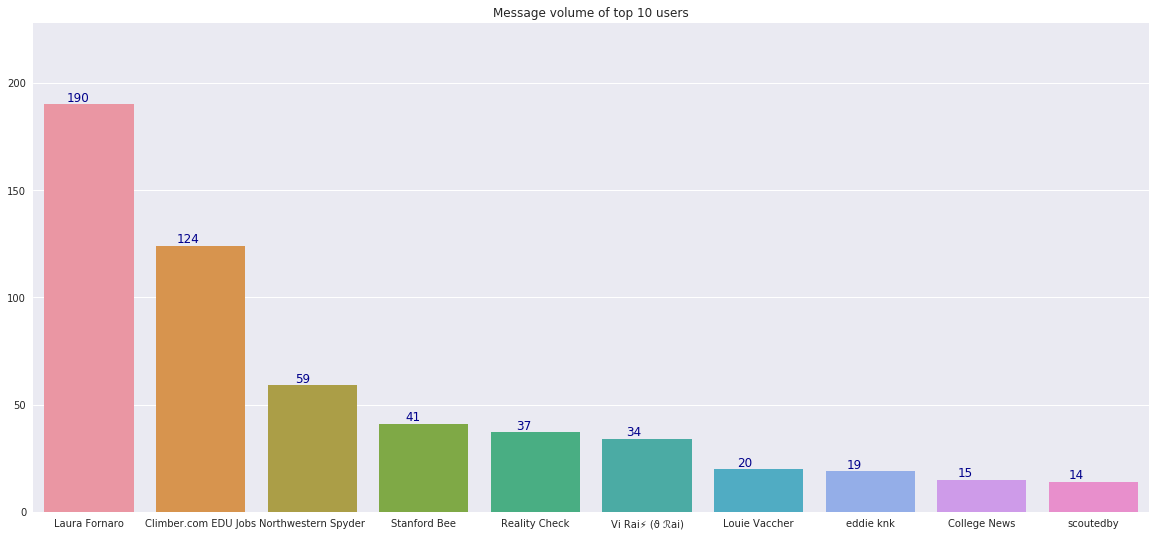

In [28]:
user_subset = user_grp.iloc[:10,:]
user_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(20,9))
plot_bar(data=user_subset, x="user_name", y="id_str", ax=ax, title="Message volume of top 10 users", highlight_max_min=False)

### How much are they tweeting about the Universities vs. other topics?

In [29]:
user_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
user_name      10 non-null object
id_str         10 non-null int64
user_id_str    10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [30]:
prolific_users = user_subset["user_name"].unique()

In [31]:
cols = ["id_str", "user_id_str", "text", "user_name", "hashtags_cleaned", "uc_tweet", "uic_tweet", "mit_tweet", "stanford_tweet", "upenn_tweet", "nw_tweet", "uni_tweet"]
uvnu_df = tweets_df[tweets_df["user_name"].isin(prolific_users)][cols]
def tmpfun(row):
    if row:
        return 1
    else:
        return 0
uvnu_df["uni_tweet"] = uvnu_df["uni_tweet"].apply(tmpfun)
uvnu_df.shape

(558, 12)

In [32]:
tmp_df = uvnu_df[["user_name", "uni_tweet"]].groupby(by="user_name", as_index=False).agg(["sum", "count"])
tmp_df.columns = ["uni_tweets", "total_tweets"]
tmp_df.reset_index(drop=False, inplace=True)
tmp_df["ratio"] = tmp_df["uni_tweets"] / tmp_df["total_tweets"]
tmp_df

,user_name,uni_tweets,total_tweets,ratio
0,Climber.com EDU Jobs,124,124,1.000000
1,College News,15,15,1.000000
2,Laura Fornaro,190,190,1.000000
3,Louie Vaccher,20,22,0.909091
4,Northwestern Spyder,59,59,1.000000
5,Reality Check,37,38,0.973684
6,Stanford Bee,41,41,1.000000
7,Vi Rai⚡️ (ϑ ℛai),34,35,0.971429
8,eddie knk,19,19,1.000000
9,scoutedby,14,15,0.933333


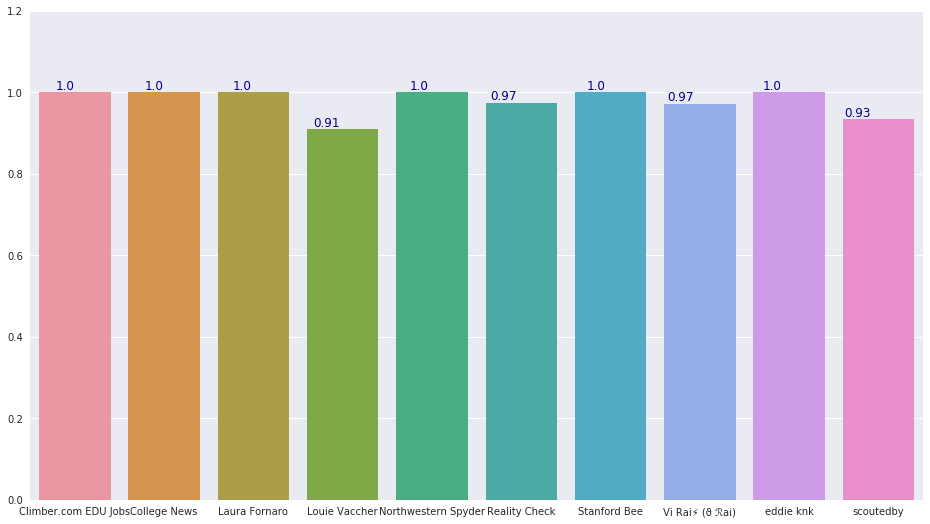

In [33]:
f, ax = plt.subplots(1,1,figsize=(16,9))
plot_bar(data=tmp_df, x="user_name", y="ratio", ax=ax, highlight_max_min=False)

### Message Retweet

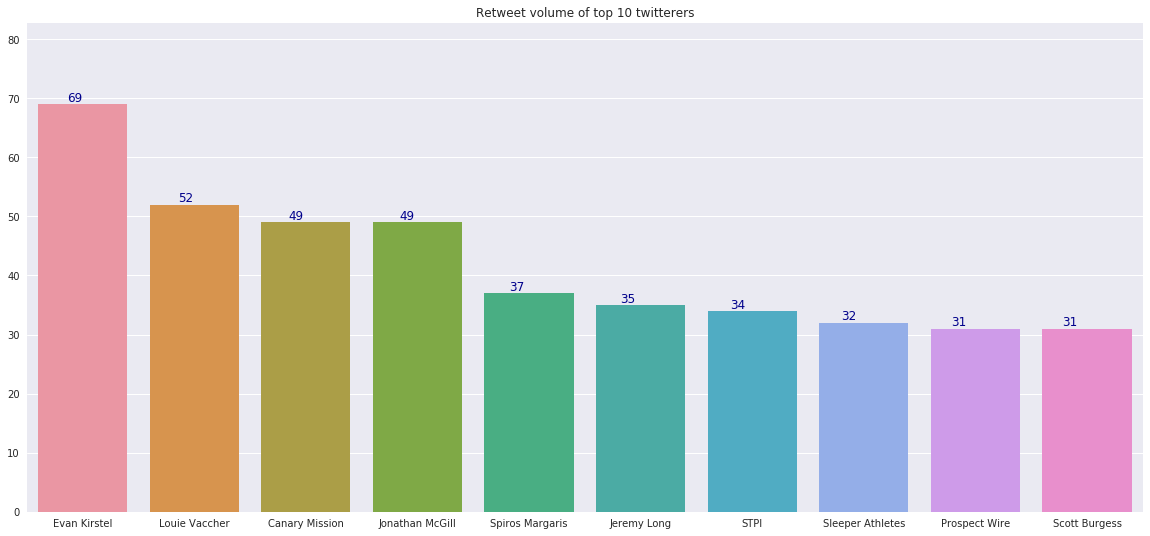

In [34]:
user_rt_grp = uni_df[["id_str", "retweeted_status_user_name"]].groupby(by=["retweeted_status_user_name"], as_index=False).count()
user_rt_grp.reset_index(drop=True, inplace=True)
user_rt_grp.sort_values(by="id_str", inplace=True, ascending=False)

user_subset = user_rt_grp.iloc[:10,:]
user_subset.reset_index(drop=True, inplace=True)
f, ax = plt.subplots(1, 1, figsize=(20,9))
plot_bar(data=user_subset, x="retweeted_status_user_name", y="id_str", ax=ax, title="Retweet volume of top 10 twitterers", highlight_max_min=False)

## Where are these Twitterers located?
-  For UChicago
-  For other universities
-  Do you see any relationship between university locations and Twitterers’ locations?
-  Visualize the relationships

In [36]:
places_df = uni_df[["id_str", "user_name", "place_country", "place_country_code", "place_name", "place_type", "uni_tweet_name"]].dropna()
places_df.head()

,id_str,user_name,place_country,place_country_code,place_name,place_type,uni_tweet_name
445,878287314484514817,TMJ-KYL Retail Jobs,United States,US,Stanford,city,stanford
552,878294919743389696,Guckenheimer Careers,United States,US,Stanford,city,stanford
748,878065723670540289,HanaHaus,United States,US,Palo Alto,city,stanford
915,878072813340381185,Sohan Dsouza,United States,US,MIT Bartos Theater,poi,mit
1002,880176843864784897,Terri Givens,United States,US,Half Moon Bay,city,stanford


In [37]:
def get_top5_places(dfs):
    return dfs.value_counts().iloc[:5].index

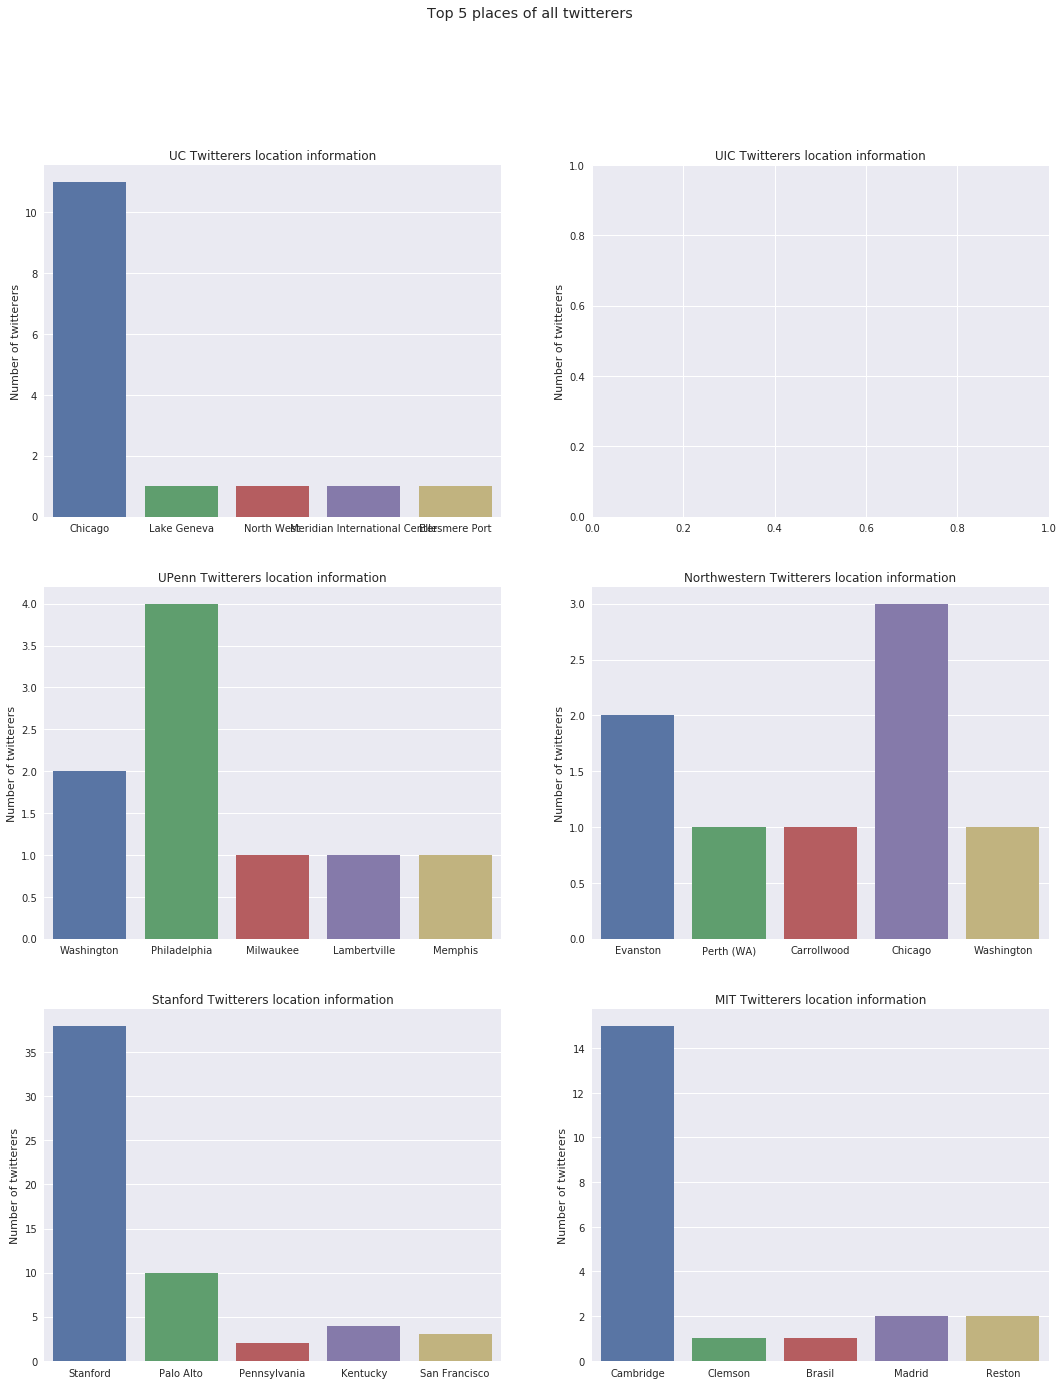

In [40]:
uc_places_df = places_df[places_df["uni_tweet_name"]=="uc"]
upenn_places_df = places_df[places_df["uni_tweet_name"]=="upenn"]
uic_places_df = places_df[places_df["uni_tweet_name"]=="uic"]
nw_places_df = places_df[places_df["uni_tweet_name"]=="nw"]
stanford_places_df = places_df[places_df["uni_tweet_name"]=="stanford"]
mit_places_df = places_df[places_df["uni_tweet_name"]=="mit"]

# Just use the top 5 places
uc_places_df = uc_places_df[uc_places_df["place_name"].isin(get_top5_places(uc_places_df["place_name"]))]
upenn_places_df = upenn_places_df[upenn_places_df["place_name"].isin(get_top5_places(upenn_places_df["place_name"]))]
uic_places_df = uic_places_df[uic_places_df["place_name"].isin(get_top5_places(uic_places_df["place_name"]))]
nw_places_df = nw_places_df[nw_places_df["place_name"].isin(get_top5_places(nw_places_df["place_name"]))]
stanford_places_df = stanford_places_df[stanford_places_df["place_name"].isin(get_top5_places(stanford_places_df["place_name"]))]
mit_places_df = mit_places_df[mit_places_df["place_name"].isin(get_top5_places(mit_places_df["place_name"]))]

f, ax = plt.subplots(3, 2,figsize=(18, 22))

g = sns.countplot(x="place_name", data=uc_places_df, ax=ax[0][0])
t = ax[0][0].set(title="UC Twitterers location information", ylabel="Number of twitterers", xlabel="")
t = g.set_xticklabels(g.get_xticklabels(), rotation=0)

g = sns.countplot(x="place_name", data=uic_places_df, ax=ax[0][1])
t = ax[0][1].set(title="UIC Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=upenn_places_df, ax=ax[1][0])
t = ax[1][0].set(title="UPenn Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=nw_places_df, ax=ax[1][1])
t = ax[1][1].set(title="Northwestern Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=stanford_places_df, ax=ax[2][0])
t = ax[2][0].set(title="Stanford Twitterers location information", ylabel="Number of twitterers", xlabel="")

g = sns.countplot(x="place_name", data=mit_places_df, ax=ax[2][1])
t = ax[2][1].set(title="MIT Twitterers location information", ylabel="Number of twitterers", xlabel="")

st = plt.suptitle("Top 5 places of all twitterers")


## What distinguishes University of Chicago Twitterers vs Twitterers who tweet about other universities
Visualize the trends

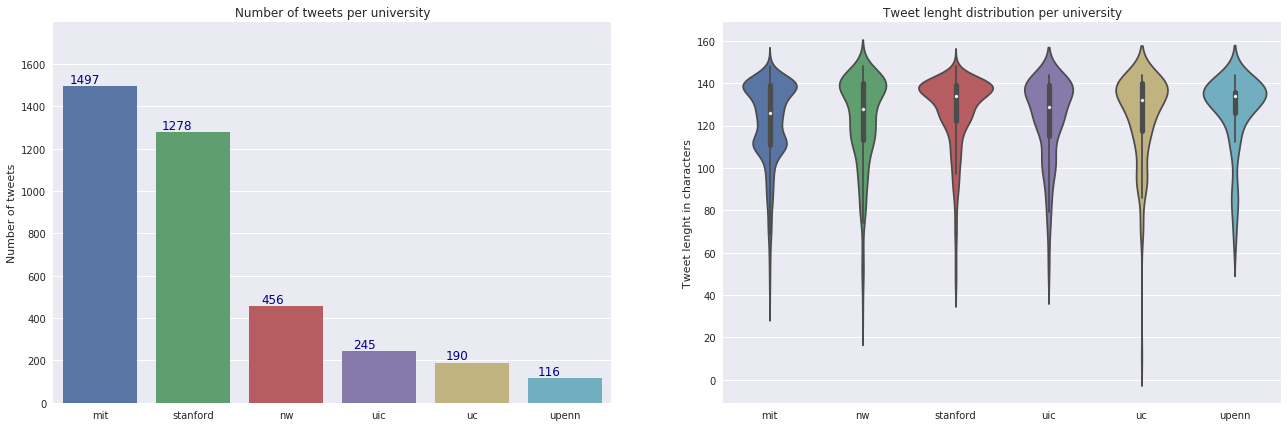

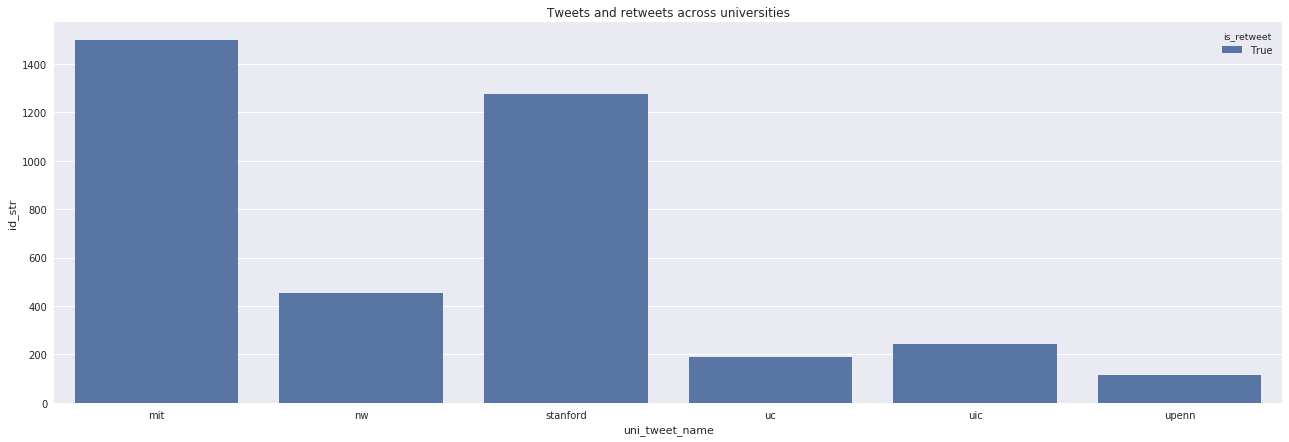

In [41]:
f, ax = plt.subplots(1,2,figsize=(22,7))

uni_counts = uni_df["uni_tweet_name"].value_counts().to_frame()
uni_counts.reset_index(drop=False, inplace=True)
uni_counts.columns = ["university", "num_tweets"]
plot_bar(x="university", y="num_tweets", data=uni_counts, ax=ax[0], highlight_max_min=False,
        title="Number of tweets per university", ylabel="Number of tweets")

sns.violinplot(data=uni_df, x="uni_tweet_name", y="text_len", ax=ax[1] )
t = ax[1].set(title="Tweet lenght distribution per university", ylabel="Tweet lenght in characters", xlabel="")

rt_uni_df = uni_df[["id_str", "retweeted_status_user_id_str", "uni_tweet_name"]]
rt_uni_df["is_retweet"] = rt_uni_df["retweeted_status_user_id_str"].apply(lambda x: True if x is not np.NaN else False)
rt_uni_grp = rt_uni_df.groupby(["uni_tweet_name", "is_retweet"], as_index=False).count()

f, ax = plt.subplots(1, 1, figsize=(22, 7))
g = sns.barplot(x="uni_tweet_name", y="id_str", hue="is_retweet", data=rt_uni_grp, ax=ax)
t = g.set(title="Tweets and retweets across universities")

## What are the timelines of these tweets? Do you see significant peaks and valleys?
Do you see data collection gaps?

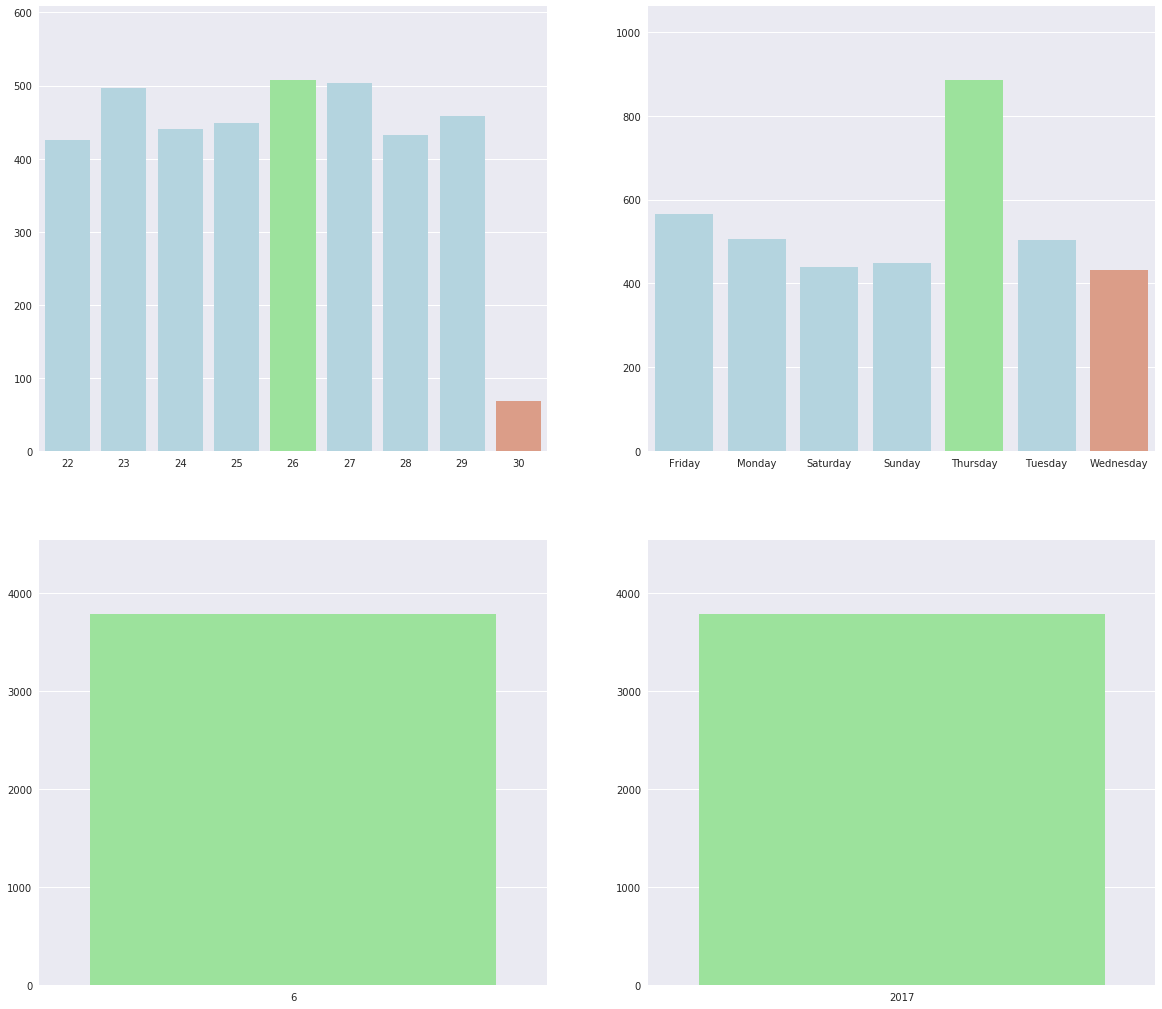

In [42]:
uni_df_date_grp = uni_df[["id_str", "created_date"]].groupby(by="created_date", as_index=False).count()
uni_df_dayofweek_grp = uni_df[["id_str", "created_dayofweek"]].groupby(by="created_dayofweek", as_index=False).count()
uni_df_month_grp = uni_df[["id_str", "created_month"]].groupby(by="created_month", as_index=False).count()
uni_df_year_grp = uni_df[["id_str", "created_year"]].groupby(by="created_year", as_index=False).count()

f, ax = plt.subplots(2,2,figsize=(20,18))
plot_bar(data=uni_df_date_grp, x="created_date", y="id_str", ax=ax[0][0], annot=False)
plot_bar(data=uni_df_dayofweek_grp, x="created_dayofweek", y="id_str", ax=ax[0][1], annot=False)
plot_bar(data=uni_df_month_grp, x="created_month", y="id_str", ax=ax[1][0], annot=False)
plot_bar(data=uni_df_year_grp, x="created_year", y="id_str", ax=ax[1][1], annot=False)

## How unique are the messages for each of these universities?
-  Are they mostly unique? Or mostly people are just copy-pasting the same text?
-  You can use something like Jaccard similarity / Cosine Similarity / Simhash / Minhash to measure uniqueness / similarity
-  Visualize message duplication (for each university – not between the universities)

In [43]:
tweets_df["text"].head()

0    RT @jmcgonigal9: Penn State student section tickets sold out in 89 minutes\n\nhttps://t.co/KIm2e...
1    ...A SIGNIFICANT WEATHER ADVISORY HAS BEEN ISSUED UNTIL 630 PM CDT FOR... Northwestern Marshall ...
2    Inspired by this innovative wave 4 forming whole students that @CSUDH is riding &amp; stoking w/...
3    RT @gringene_bio: @Big3BioSF @OmicsOmicsBlog @Stanford @PacBio If you're making DNA look like it...
4                                                @SheWhoVotes He went to Northwestern Law School? 😂 jk 🗿
Name: text, dtype: object

We will need to remove all the Re-tweets to ensure we aren't inordinately biased towards some tweets.

In [44]:
rows_to_drop = uni_df[~uni_df["retweeted_status_user_id_str"].isna()].index
# Drop all the rows with retweets
unique_uni_tweets_df = uni_df.drop(rows_to_drop, axis=0)

In [45]:
uc_tweets = unique_uni_tweets_df[unique_uni_tweets_df["uc_tweet"]==True]["text"]
uic_tweets = unique_uni_tweets_df[unique_uni_tweets_df["uic_tweet"]==True]["text"]
upenn_tweets = unique_uni_tweets_df[unique_uni_tweets_df["upenn_tweet"]==True]["text"]
nw_tweets = unique_uni_tweets_df[unique_uni_tweets_df["nw_tweet"]==True]["text"]
stanford_tweets = unique_uni_tweets_df[unique_uni_tweets_df["stanford_tweet"]==True]["text"]
mit_tweets = unique_uni_tweets_df[unique_uni_tweets_df["mit_tweet"]==True]["text"]

Some helper functions

In [46]:
def get_features(s):
    width = 3
    s = s.lower()
    s = re.sub(r'[^\w]+', '', s)
    return [s[i:i + width] for i in range(max(len(s) - width + 1, 1))]

def get_ratios(df):
    data = df.to_dict()
    objs = [(str(k), Simhash(get_features(v))) for k, v in data.items()]
    index = SimhashIndex(objs, k=3)
    list_all = []
    for i in range(0,len(data)):
        s1 = list(data.values())[i]
        s2 = Simhash(get_features(s1))
        list_all.append(len(index.get_near_dups(s2)))
    a = [0 if i == 1 else 1 for i in list_all]
    duplicate = sum(a)
    unique = len(a)-sum(a)
    return duplicate, unique

In [47]:
uc_dup, uc_unique = get_ratios(uc_tweets)
uic_dup, uic_unique = get_ratios(uic_tweets)
upenn_dup, upenn_unique = get_ratios(upenn_tweets)
nw_dup, nw_unique = get_ratios(nw_tweets)
stanford_dup, stanford_unique = get_ratios(stanford_tweets)
mit_dup, mit_unique = get_ratios(mit_tweets)

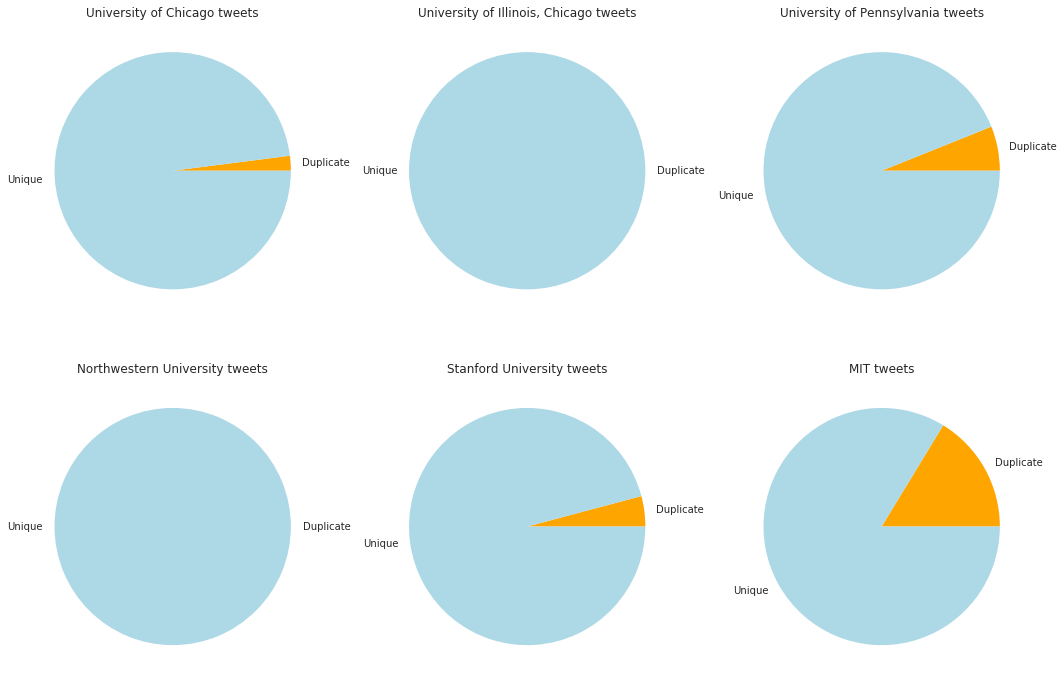

In [48]:
def plot_pie(values, labels, colors, ax):
    ax.pie(x=values, labels=labels, colors=colors)

labels = ['Duplicate', 'Unique']
colors = ['orange','lightblue']
f, ax = plt.subplots(2, 3, figsize=(18, 12))
plot_pie(values=[uc_dup, uc_unique], labels=labels, colors=colors, ax=ax[0][0])
ax[0][0].set(title="University of Chicago tweets")

plot_pie(values=[uic_dup, uic_unique], labels=labels, colors=colors, ax=ax[0][1])
ax[0][1].set(title="University of Illinois, Chicago tweets")

plot_pie(values=[upenn_dup, upenn_unique], labels=labels, colors=colors, ax=ax[0][2])
ax[0][2].set(title="University of Pennsylvania tweets")

plot_pie(values=[nw_dup, nw_unique], labels=labels, colors=colors, ax=ax[1][0])
ax[1][0].set(title="Northwestern University tweets")

plot_pie(values=[stanford_dup, stanford_unique], labels=labels, colors=colors, ax=ax[1][1])
ax[1][1].set(title="Stanford University tweets")

plot_pie(values=[mit_dup, mit_unique], labels=labels, colors=colors, ax=ax[1][2])
t = ax[1][2].set(title="MIT tweets")

